<a href="https://colab.research.google.com/github/giorginolab/GSN-Tutorial-BCN-2020/blob/master/GSN_Tutorial_BCN_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MD analysis: Gelsolin WT/mutant, apo/nanobody example 
## MSI course, Master in Bioinformatics for Health Sciences, UPF
*Toni Giorgino, IBF-CNR, Italy* - www.giorginolab.it

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Pt9gGqiGtrA9_5VRr4J7h3D_WLrBK4k8)

This is a Python notebook, based on Google Colaboratory platform. For an introduction to the platform, see [here](https://colab.research.google.com/notebooks/welcome.ipynb). You will be able to edit Python statements on this notebook by entering them into "cells", and execute them with the "play" button.

Notes:
 * The order of execution matters, not the order of display. 
 * To start from scratch, restart the runtime. 
 * Shell commands: prefix with an ! symbol.  E.g. `!ls -l` lists the contents of the current directory.
 * If you don't have a Google account, you may copy-paste the  statements in  local Python installations.
 * To plot, see examples [here](https://colab.research.google.com/notebooks/charts.ipynb).

The class is based on the following paper:

> Giorgino T, Analysis libraries for molecular trajectories: a cross-language synopsis. Chapter 20 in:  Biomolecular Simulations: Methods and Protocols Edited by M. Bonomi and C. Camilloni (Springer, ISBN 978-1-4939-9608-7).  [Preprint here](https://github.com/giorginolab/preprints-repository/tree/master/analysis_libraries_chapter)

and on the biological example from:

> Giorgino T, Mattioni D, Hassan A, Milani M, Mastrangelo E, Barbiroli A, et al. Nanobody interaction unveils structure, dynamics and proteotoxicity of the Finnish-type amyloidogenic gelsolin variant. Biochimica et Biophysica Acta (BBA) - Molecular Basis of Disease. 2019 Mar 1;1865(3):648–60. [Journal version](https://www.sciencedirect.com/science/article/pii/S0925443919300109?via%3Dihub). [Preprint here](https://arxiv.org/abs/1903.07308).





# Retrieve simulation trajectories

This copies data on the server which is running the calculations (not your computer). See below to download files to your PC.

In [1]:
#@title Default title text
# Get the data files
! git clone https://github.com/giorginolab/GSN-Tutorial-BCN-2020.git

Cloning into 'GSN-Tutorial-BCN-2020'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 35 (delta 10), reused 23 (delta 7), pack-reused 0
Unpacking objects: 100% (35/35), done.


In [2]:
%cd /content/GSN-Tutorial-BCN-2020/data

/content/GSN-Tutorial-BCN-2020/data


In [3]:
!ls -l

total 66820
-rw-r--r-- 1 root root  3505896 Apr 23 18:09 D187N+Nb-run.pdb
-rw-r--r-- 1 root root  4938249 Apr 23 18:09 D187N+Nb-run.psf
-rw-r--r-- 1 root root  9578580 Apr 23 18:09 D187N+Nb-run-subset.xtc
-rw-r--r-- 1 root root  2086286 Apr 23 18:09 D187N-run.pdb
-rw-r--r-- 1 root root  2877716 Apr 23 18:09 D187N-run.psf
-rw-r--r-- 1 root root  8284912 Apr 23 18:09 D187N-run-subset.xtc
-rw-r--r-- 1 root root      296 Apr 23 18:09 load-all.vmd
-rw-r--r-- 1 root root  3505653 Apr 23 18:09 WT+Nb-run.pdb
-rw-r--r-- 1 root root  4937615 Apr 23 18:09 WT+Nb-run.psf
-rw-r--r-- 1 root root 14860688 Apr 23 18:09 WT+Nb-run-subset.xtc
-rw-r--r-- 1 root root  2086286 Apr 23 18:09 WT-run.pdb
-rw-r--r-- 1 root root  2877395 Apr 23 18:09 WT-run.psf
-rw-r--r-- 1 root root  8856064 Apr 23 18:09 WT-run-subset.xtc


# Download results to your PC

To download any file (not necessary, but may be useful to inspect results), use this...

In [0]:
from google.colab import files

# files.download('example.txt')

# Install Python libraries

In [5]:
# !pip install mdtraj
# !pip install mdanalysis
!pip install moleculekit


     |████████████████████████████████| 5.2MB 2.6MB/s 
     |████████████████████████████████| 10.4MB 34.4MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
  Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Successfully uninstalled pandas-1.0.3


# Analysis starts here

We will make use of Python (and its Numpy library) functions to answer a series of questions. Access to the molecular properties will use the Moleculekit functions ([manual](https://software.acellera.com/docs/latest/moleculekit/index.html)).  

Rewriting them in one of the other libraries and languages may be an useful exercise.

In [0]:
#import MDAnalysis as mda
import moleculekit as mk
import numpy as np
import matplotlib.pyplot as plt
from moleculekit.molecule import Molecule

In [0]:
# The file set we plan to analyze. In this case it may be WT, WT+Nb, 
# D187N, D187N+Nb .

pdb="WT+Nb-run.pdb"
xtc="WT+Nb-run-subset.xtc"

# psf="WT+Nb-run.psf"  # but we don't use this one


In [0]:
m=Molecule(pdb)

In [9]:
m

Molecule with 43279 atoms and 1 frames
Atom field - altloc shape: (43279,)
Atom field - atomtype shape: (43279,)
Atom field - beta shape: (43279,)
Atom field - chain shape: (43279,)
Atom field - charge shape: (43279,)
Atom field - coords shape: (43279, 3, 1)
Atom field - element shape: (43279,)
Atom field - insertion shape: (43279,)
Atom field - masses shape: (43279,)
Atom field - name shape: (43279,)
Atom field - occupancy shape: (43279,)
Atom field - record shape: (43279,)
Atom field - resid shape: (43279,)
Atom field - resname shape: (43279,)
Atom field - segid shape: (43279,)
Atom field - serial shape: (43279,)
angles shape: (0, 3)
bonds shape: (0, 2)
bondtype shape: (0,)
box shape: (3, 1)
boxangles shape: (3, 1)
crystalinfo: {}
dihedrals shape: (0, 4)
fileloc shape: (1, 2)
impropers shape: (0, 4)
reps: 
ssbonds shape: (0,)
step shape: (1,)
time shape: (1,)
topoloc: /content/GSN-Tutorial-BCN-2020/data/WT+Nb-run.pdb
viewname: WT+Nb-run.pdb

In [10]:
m.read(xtc)
m

Molecule with 43279 atoms and 80 frames
Atom field - altloc shape: (43279,)
Atom field - atomtype shape: (43279,)
Atom field - beta shape: (43279,)
Atom field - chain shape: (43279,)
Atom field - charge shape: (43279,)
Atom field - coords shape: (43279, 3, 80)
Atom field - element shape: (43279,)
Atom field - insertion shape: (43279,)
Atom field - masses shape: (43279,)
Atom field - name shape: (43279,)
Atom field - occupancy shape: (43279,)
Atom field - record shape: (43279,)
Atom field - resid shape: (43279,)
Atom field - resname shape: (43279,)
Atom field - segid shape: (43279,)
Atom field - serial shape: (43279,)
angles shape: (0, 3)
bonds shape: (0, 2)
bondtype shape: (0,)
box shape: (3, 80)
boxangles shape: (3, 80)
crystalinfo: {}
dihedrals shape: (0, 4)
fileloc shape: (80, 2)
impropers shape: (0, 4)
reps: 
ssbonds shape: (0,)
step shape: (80,)
time shape: (80,)
topoloc: /content/GSN-Tutorial-BCN-2020/data/WT+Nb-run.pdb
viewname: WT+Nb-run.pdb

# Exercises

Write code to answer the following questions

## How many chains are there? 

Note that these are simulation structures, and may use chains for different purposes than crystallographic structures.

In [11]:
# Write and test your answer here

np.unique(m.chain)

array(['B', 'D', 'I', 'W'], dtype=object)

## How many residues per each chain?

In [12]:
for ch in np.unique(m.chain):
  tmp = m.copy()
  tmp.filter(f"protein and chain {ch} and name CA")
  nres = tmp.numAtoms
  print(f"Chain {ch} has {nres} residues (CA atoms)")

2020-04-23 18:10:08,464 - moleculekit.molecule - INFO - Removed 43153 atoms. 126 atoms remaining in the molecule.


Chain B has 126 residues (CA atoms)


2020-04-23 18:10:09,468 - moleculekit.molecule - INFO - Removed 43177 atoms. 102 atoms remaining in the molecule.


Chain D has 102 residues (CA atoms)


2020-04-23 18:10:10,466 - moleculekit.molecule - INFO - Removed 43279 atoms. 0 atoms remaining in the molecule.


Chain I has 0 residues (CA atoms)


2020-04-23 18:10:11,458 - moleculekit.molecule - INFO - Removed 43279 atoms. 0 atoms remaining in the molecule.


Chain W has 0 residues (CA atoms)


In [13]:
# Alternative (non-destructive) implementation
for ch in np.unique(m.chain):
  asel=m.atomselect(f"protein and chain {ch} and name CA")
  nres = np.sum(asel)
  print(f"Chain {ch} has {nres} residues (CA atoms)")

Chain B has 126 residues (CA atoms)
Chain D has 102 residues (CA atoms)
Chain I has 0 residues (CA atoms)
Chain W has 0 residues (CA atoms)


## How many atoms?

In [14]:
for ch in np.unique(m.chain):
  tmp = m.copy()
  tmp.filter(f"protein and chain {ch}")
  nat = tmp.numAtoms
  print(f"Chain {ch} has {nat} atoms")

2020-04-23 18:10:15,466 - moleculekit.molecule - INFO - Removed 41407 atoms. 1872 atoms remaining in the molecule.


Chain B has 1872 atoms


2020-04-23 18:10:16,437 - moleculekit.molecule - INFO - Removed 41689 atoms. 1590 atoms remaining in the molecule.


Chain D has 1590 atoms


2020-04-23 18:10:17,433 - moleculekit.molecule - INFO - Removed 43279 atoms. 0 atoms remaining in the molecule.


Chain I has 0 atoms


2020-04-23 18:10:18,405 - moleculekit.molecule - INFO - Removed 43279 atoms. 0 atoms remaining in the molecule.


Chain W has 0 atoms


## Is your structure solvated? If so, remove solvent.

In [15]:
nwat = np.sum(m.atomselect("water"))
print(nwat)

m_nowater = m.copy()
m_nowater.filter("not water")

39759


2020-04-23 18:10:20,112 - moleculekit.molecule - INFO - Removed 39759 atoms. 3520 atoms remaining in the molecule.


array([ 1872,  1873,  1874, ..., 43219, 43220, 43221], dtype=int32)

## How many frames? How many nanoseconds?

In [16]:
nf = m.numFrames
print(f"There are {nf} frames")

There are 80 frames


## Count how many species of ions and how many of each

In [17]:
ions = m_nowater.copy()
ions.filter("ions")
ions.name

2020-04-23 18:10:20,235 - moleculekit.molecule - INFO - Removed 3462 atoms. 58 atoms remaining in the molecule.


array(['CAL', 'CAL', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA',
       'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA',
       'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA',
       'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'CLA', 'SOD', 'SOD', 'SOD',
       'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD',
       'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD', 'SOD',
       'SOD', 'SOD', 'SOD', 'SOD'], dtype=object)

In [18]:
for i in np.unique(ions.name):
  ni = sum(ions.atomselect(f"name {i}"))
  print(f"Ion {i} has {ni} atoms")

# Alternatively: np.unique(ions.name, return_counts=True)

Ion CAL has 2 atoms
Ion CLA has 31 atoms
Ion SOD has 25 atoms


Now keep only chain D and align to its frame 0

In [19]:
md = m.copy()
md.filter("protein and chain D and name CA")


2020-04-23 18:10:21,530 - moleculekit.molecule - INFO - Removed 43177 atoms. 102 atoms remaining in the molecule.


array([    0,     1,     2, ..., 43276, 43277, 43278], dtype=int32)

## Align to the G2's first frame

In [20]:
md.align("name CA")

# In case you want to inspect
md.write("check.pdb")
md.write("check.xtc")

/usr/local/lib/python3.6/dist-packages/moleculekit/align.py:16: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, A), array(float32, 2d, A))
  covariance = np.dot(P.T, Q)
/usr/local/lib/python3.6/dist-packages/moleculekit/align.py:54: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, A), array(float32, 2d, A))
  all1 = np.dot(all1, rot.T)


## Inspect the shape of the coordinates. 

They are organized as follows: atoms x [xyz] x frames

In [21]:
md.coords.shape

(102, 3, 80)

## Compute backbone global RMSD(t) 

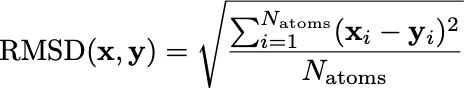

In [22]:
T = md.numFrames
N = md.numAtoms # CA only: 1 atom = 1 residue

rmsdT = np.zeros((T))
X = md.coords[:,:,0]  # First frame, all axes, all atoms

for t in range(T):
  Y = md.coords[:,:,t]  # Frame at t, all axes, all atoms
  d2 = (X-Y)**2   # This is still a matrix
  sd2 = np.sum(d2)/N
  rmsdT[t]=np.sqrt(sd2)

print(rmsdT)

[0.         0.82842946 1.05544773 0.93853878 1.08333973 1.30272074
 1.11527914 0.93128822 0.96388051 0.98519583 1.353881   1.24414072
 1.37935483 1.22356928 1.42647068 1.16690134 1.23553916 1.19546493
 1.20277102 1.02297115 1.25717569 1.16625664 1.27760951 1.0851937
 1.00021562 1.01993867 1.01860151 1.05558942 0.98216355 1.25240403
 1.21906382 1.24838536 1.15900866 1.09457693 1.16679358 0.94538561
 0.99107854 1.12425756 0.96595429 1.05542431 0.98756963 1.13863105
 1.30065842 1.05669856 1.19505366 1.11283672 1.21754712 1.20406445
 1.44376319 1.46410909 1.19801261 1.33287811 1.15781186 1.20199547
 1.10337311 1.05041815 1.16629993 1.16994633 1.08975514 1.19704641
 1.27370167 1.01386485 1.24716355 1.58714828 1.54043483 1.57758525
 1.72665079 1.66481208 1.98547979 1.92099483 1.97054851 2.15665811
 1.72762772 1.86547154 1.95342315 1.88536329 1.29069592 1.54156787
 1.56915865 1.80288965]


In [23]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(nF), rmsdT)
plt.xlabel("Simulation time (ns)")
plt.ylabel("Cα RMSD (Å)")

NameError: ignored

<Figure size 720x360 with 0 Axes>

In [0]:
# This is an alternative implementation which uses moleculekit "projection" functions

from moleculekit.projections.metricrmsd import *
rmsdT_alt=MetricRmsd(m_nowater,"chain D and protein and name CA").project(m_nowater)

plt.figure(figsize=(10,5))
plt.plot(rmsdT_alt)

## Compute displacements *by residue and time*.

In [0]:
rmsdRT = np.zeros((T,N))

for i in range(N):
  Xi = md.coords[i,:,0] # First frame, all axes, atom i
  for t in range(T):
    Yi = md.coords[i,:,t]  # Time t, atom i, 3D vector
    dist = np.sum((Xi-Yi)**2)   # Displacement^2
    rmsdRT[t,i]=np.sqrt(dist)

print(rmsdRT)

In [0]:
plt.figure(figsize=(10,5))
plt.imshow(rmsdRT.T, aspect="auto", cmap="binary")
plt.ylabel("Residue")
plt.xlabel("Time (ns)")

## Average over time

In [0]:
plt.figure(figsize=(10,5))
rmsdR = np.mean(rmsdRT,axis = 0) # <-- note: mean over axis 0, which is time
plt.plot(np.arange(N), rmsdR)
plt.xlabel("Residue")
plt.ylabel("Mean displacement (A)")

In [0]:
# Alternative implementation using projections

from moleculekit.projections.metricfluctuation import *

m_nowater_fr0 = m_nowater.copy()
m_nowater_fr0.dropFrames(keep=0)
rmsdRT_alt=MetricFluctuation("chain D and protein and name CA", refmol=m_nowater_fr0).project(m_nowater)

plt.figure(figsize=(10,5))
plt.imshow(np.sqrt(rmsdRT_alt.T), aspect="auto", cmap="binary")
plt.ylabel("Residue")
plt.xlabel("Time (ns)")
